In [26]:
from pymatgen.ext.matproj import MPRester

from IPython.display import FileLink
from pymatgen.phonon.plotter import *
import numpy as np
import matplotlib.pyplot as plt

In [27]:
with MPRester("MykrkEqBZ7EQ2VUWndzndDME88749Z5b") as m:
    struc = m.get_structure_by_material_id("mp-961706")
    b=m.get_phonon_bandstructure_by_material_id("mp-961706")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

On va plot la zone de Brillouin de notre matériaux.

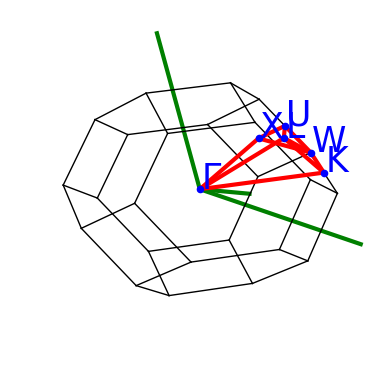

In [28]:
PhononBSPlotter(b).plot_brillouin();

Ensuite, nous allons plot la structure de bande des phonons.

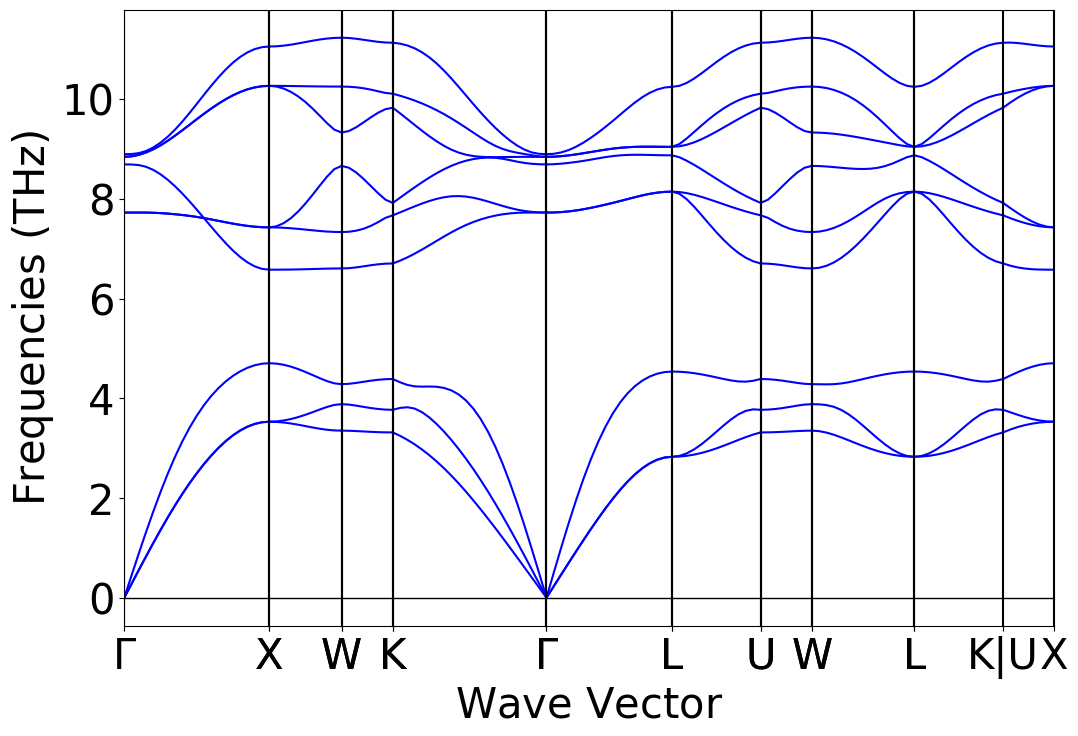

In [29]:
PhononBSPlotter(b).show()

On voit que nos bandes acoustiques sont T-X, K-T et enfin T-L.

Vitesse du son.

Premièrement, la vitesse du son dans un solide est anisotrope. Ce qui peut faire apparaître des différences entre les vitesses associées aux différentes directions.Deuxièmement, la vitesse du son correspond à la dérivée partielle de w par rapport à q, ou w est la relation de dispersion de notre matériau et q notre vecteur d'onde. Après avoir injecté la formule: w=2pi*f, on obtient que la vitesse du son est égale à 2PI*(la dérivée partielle de f par rapport à q)  avec f la fréquence en Hertz. La dérivée partielle de f par rapport à q peut être approximée avec la pente autour de chaque point.

Première bande acoustique.

In [34]:
data = PhononBSPlotter(b).bs_plot_data()

f = data['frequency'];d = data['distances']

#On prends bien l'indice 0 car python commence à compter en 0
fre_1=f[0][1]; d_1=d[0] 

vs1 = 2*np.pi*np.abs((fre_1[1]-fre_1[0])*(10**12))/((d_1[1]-d_1[0])*(10**10))


Deuxième bande acoustique.

In [35]:
#On prends l'indice 3 car la deuxième direction correspond à notre "3e parcours"(si on commence à compter en 0)
fre_2=f[3][0]; d_2=d[3]

vs2 = 2*np.pi*np.abs((fre_2[-1] - fre_2[-2])*(10**12))/((d_2[-1]-d_2[-2])*(10**10))


Troisième bande acoustique.

In [36]:
#On prends l'indice 4 car la deuxième direction correspond à notre "4e parcours"(si on commence à compter en 0)
fre_3=f[4][2]; d_3=d[4]

vs3 = 2*np.pi*np.abs((fre_3[1]-fre_3[0])*(10**12))/((d_3[1]-d_3[0])*(10**10))


Dans cette cellule, on va plot nos pentes et print les vitesses associées aux différentes directions. 

La vitesse du son dans la direction1(direction Gamma - X) vaut 3244.086699097555 m/s et la pente associée est représentée en   vert sur le graphique.
La vitesse du son dans la direction 2(direction K - Gamma) vaut 2335.3192951132814 m/s et la pente associée est représentée en jaune sur le graphique.
La vitesse du son dans la direction 3(direction Gamma - L) vaut 5831.32584676982 m/s et la pente associée est représentée en   rouge sur le graphique.


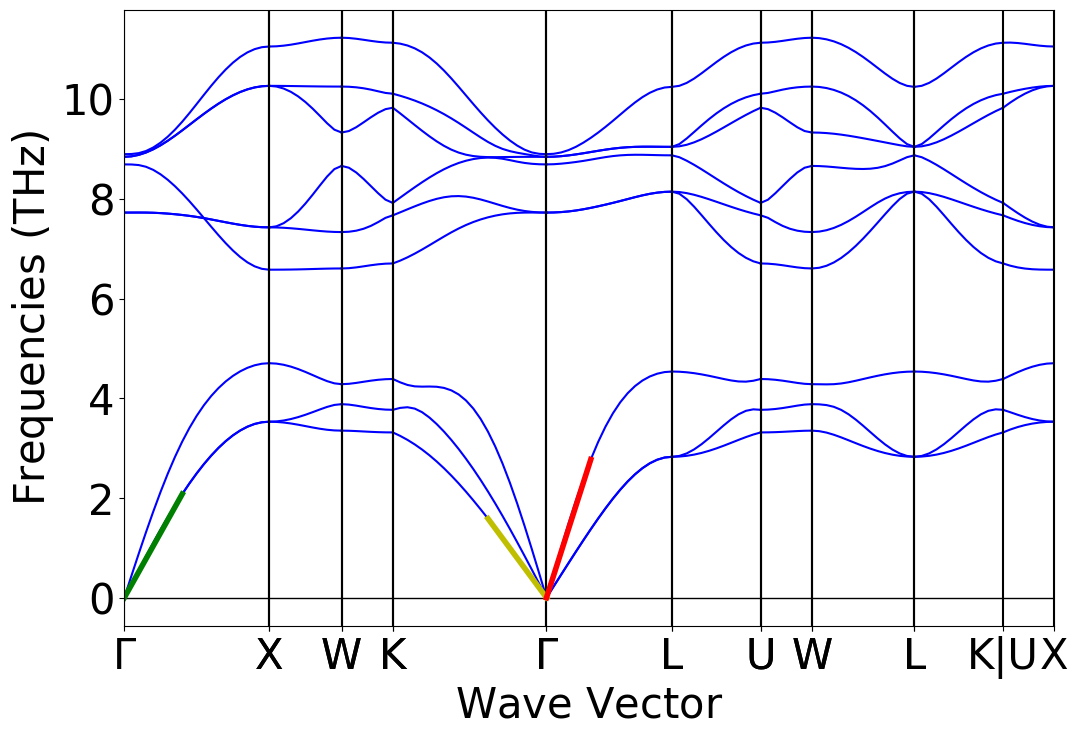

In [39]:
PhononBSPlotter(b).get_plot()
print("La vitesse du son dans la direction1(direction Gamma - X) vaut {} m/s et la pente associée est représentée en   vert sur le graphique.".format(vs1))
print("La vitesse du son dans la direction 2(direction K - Gamma) vaut {} m/s et la pente associée est représentée en jaune sur le graphique.".format(vs2))
print("La vitesse du son dans la direction 3(direction Gamma - L) vaut {} m/s et la pente associée est représentée en   rouge sur le graphique.".format(vs3))
# Première pente représentée en vert sur le graphique
plt.plot([d_1[0],d_1[8]],[fre_1[0],fre_1[8]], color='g', lw=4)
# Deuxième pente représentée en jaune sur le grpahique.
plt.plot([d_2[13],d_2[-1]],[fre_2[13],fre_2[-1]], color='y', lw=4)
# Troisième pente, représenté en rouge sur le graphique
plt.plot([d_3[0], d_3[6]],[fre_3[0],fre_3[6]], color='r', lw=4)


Finalement , on voit que notre vitesses dans la 3e direction est la plus importante. C'est à dire que le son se propage plus vite dans cette direction. Cela est cohérent avec le graphe ci-dessus car la pente dans la 3e direction est la plus importante.